Statsmodels is python module that provides classes and functions for estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data 

df=pd.read_excel('Data/Superstore_Sales_Records.xls',index_col='Order Date', parse_dates=True)

In [3]:
df.shape

(9994, 20)

In [5]:
df=df[df["Category"]=="Furniture"]
df=df.groupby(by=['Order Date']).agg({"Sales":sum})
df.sort_index(inplace=True)
df.head()

/var/folders/j9/2xjjcspd5r3dz1m4ll_0c7m80000gn/T/ipykernel_3418/507276604.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df=df.groupby(by=['Order Date']).agg({"Sales":sum})


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [6]:
#resample on the monthly level 

df= df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


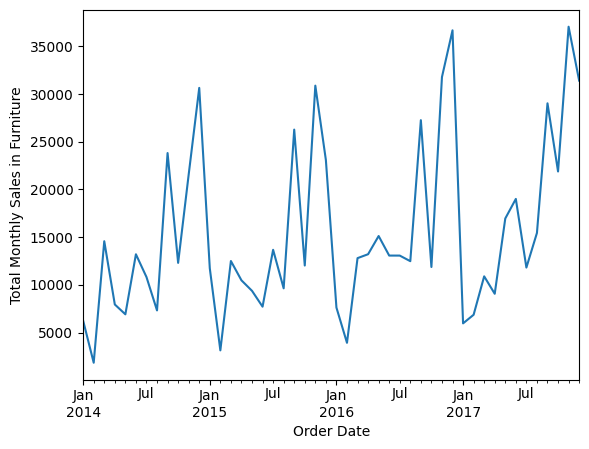

In [12]:
# Create the plot and get the Axes object
ax = df["Sales"].plot()
ax.autoscale(axis="x", tight=True)

# Set the label for the y-axis
ax.set_ylabel("Total Monthly Sales in Furniture")

# Show the plot
plt.show()

